In [38]:
import numpy as np
import matplotlib.pyplot as plt

In [39]:
A = np.array([[-0.717, -23.827], [114.483, -640.393]])
Y0 = np.array([1.0, 2.0])
B = np.array([[-1.905, -0.015], [-0.13, -2.295]])
Z0 = np.array([1.0, 0.0])

t0, t1 = 0.0, 1.0
h = 0.01

In [40]:
def euler(A, Y0, t0, t1, h):
    """
    Функция, решающяя дифференциальное уравнение через метод Эйлера
    """
    t_arr = np.arange(t0, t1 + h, h)
    y_arr = np.zeros((len(t_arr), len(Y0)))
    y_arr[0] = Y0

    for i in range(0, len(t_arr) - 1):  # вычисляем y в точках разбиения
        y_arr[i + 1] = y_arr[i] + h * (np.dot(A, y_arr[i]))
    return t_arr, y_arr

In [41]:
t_y, y = euler(A, Y0, t0, t1, h)
t_z, z = euler(B, Z0, t0, t1, h)

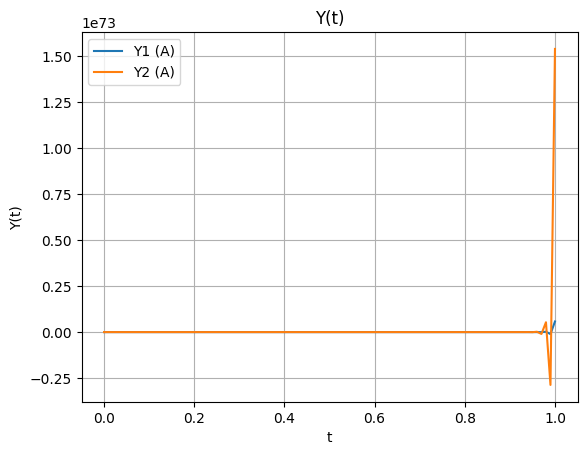

In [42]:
plt.plot(t_y, y[:, 0], label='Y1 (A)')
plt.plot(t_y, y[:, 1], label='Y2 (A)')
plt.title('Y(t)')
plt.xlabel('t')
plt.ylabel('Y(t)')
plt.legend()
plt.grid(True)
plt.show()

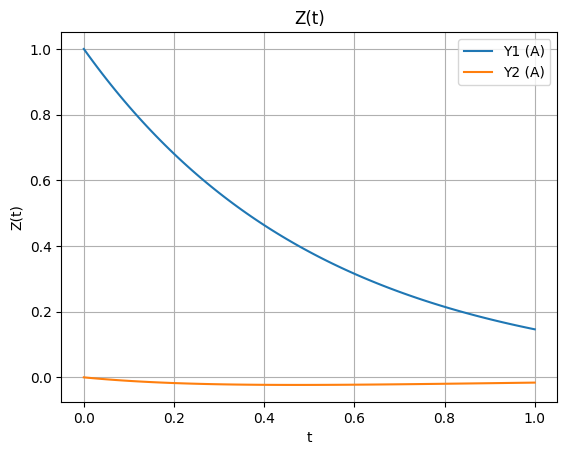

In [43]:
plt.plot(t_z, z[:, 0], label='Y1 (A)')
plt.plot(t_z, z[:, 1], label='Y2 (A)')
plt.title('Z(t)')
plt.xlabel('t')
plt.ylabel('Z(t)')
plt.legend()
plt.grid(True)
plt.show()

In [46]:
def is_stability(A):
    """
    Функция для определя является ли задача Коши устойчивой
    """
    lambdas = np.linalg.eigvals(A)
    max_lambda = np.max(np.abs(lambdas))
    return h < 2 / max_lambda

In [51]:
print(f'Явный метод Ньютона устойчив для Y? {is_stability(A)}')
print(f'Явный метод Ньютона устойчив для Z? {is_stability(B)}')

Явный метод Ньютона устойчив для Y? False
Явный метод Ньютона устойчив для Z? True


In [59]:
def is_stiff(A):
    lambdas = np.linalg.eigvals(A)
    re_of_lambdas = np.real(lambdas)
    return np.any(re_of_lambdas > 0)

In [69]:
def is_stiff(A):
    """
    Функция для определения является ли задача жесткой
    Определение жесткости со страницы 239 учебника (формула 14.130)
    """
    lambdas = np.linalg.eigvals(A)
    re_of_lambdas = np.real(lambdas)
    s = np.abs(re_of_lambdas).max() / np.abs(re_of_lambdas).min()
    return s

In [74]:
print(f'Коэффициентом жесткости задачи Y = {is_stiff(A)}')
print(f'Коэффициентом жесткости задачи Z = {is_stiff(B)}')

Коэффициентом жесткости задачи Y = (True, 126.96253782159295)
Коэффициентом жесткости задачи Z = (True, 1.2104535921354116)


Если коэффициент >> 1, то считаем задачу жесткой. В нашем случае жесткой является задача Y.